In [2]:
import keras
from keras import layers 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

Using TensorFlow backend.


In [5]:
# iris.csv数据集：燕尾花的分类
data = pd.read_csv('E:/Python_code/keras_total/日月光华-keras课程资料/小型数据集/iris.csv')

In [6]:
data.head(5)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


# 数据预处理

In [28]:
# 把最后一类的字符串，进行数值化 —— 独热编码
# pd.get_dummies(data.Species)  # pandas自带的独热编码函数；把返回的结果直接加原表里
data = data.join( pd.get_dummies(data.Species) )

In [29]:
del data['Species']

In [30]:
data

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,setosa,versicolor,virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0,0,1
146,147,6.3,2.5,5.0,1.9,0,0,1
147,148,6.5,3.0,5.2,2.0,0,0,1
148,149,6.2,3.4,5.4,2.3,0,0,1


In [40]:
# 数据排的太有规律了不好：同一类型的花都连排在一起了！
# 最后做一个乱序：
index = np.random.permutation( len(data) )
data = data.iloc[index]

In [41]:
# 特征值x：Sepal.Length、Sepal.Width、Petal.Length、Petal.Width 这4列
# 目标值y：setosa、versicolor、virginica 这3列
x = data[ data.columns[1:5] ]
y = data[ data.columns[5:] ]

In [42]:
x.shape, y.shape

((150, 4), (150, 3))

# 网络搭建

In [45]:
model = keras.Sequential()

In [46]:
# 多分类：输出是3类，输入是4个特征(Dense第一个参数是“输出数据”的维度)
model.add( layers.Dense(3, input_dim = 4, activation='softmax') )  

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


为什么多分类时，会有15个参数：
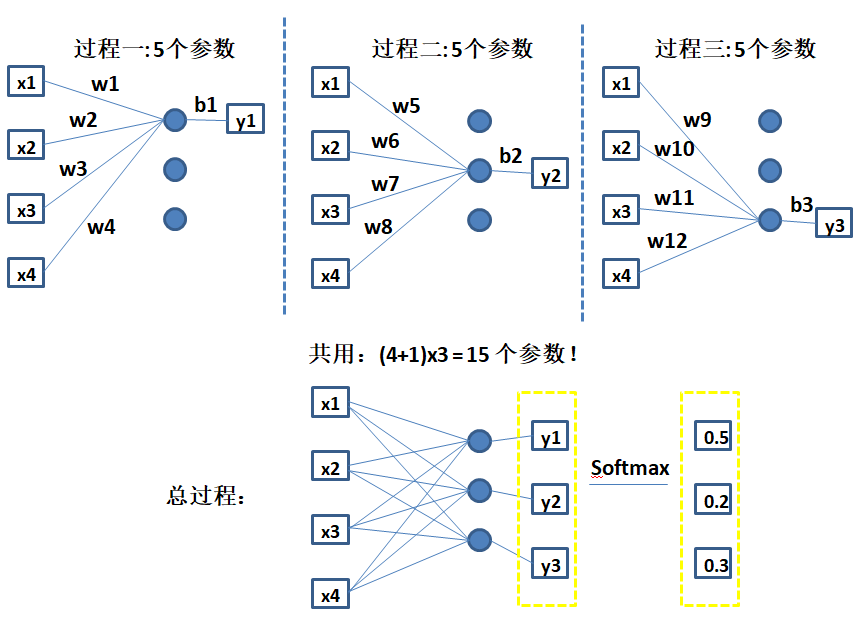

In [49]:
# 对“目标数据”使用独热编码时，用：categorical_crossentropy 损失函数，计算softmax交叉熵！
model.compile( optimizer='adam',
               loss = 'categorical_crossentropy',
               metrics = ['acc']
)

In [53]:
history = model.fit(x, y, epochs=500)

Epoch 1/500
150/150 [==============================] - 0s 33us/step - loss: 0.4690 - acc: 0.8067
Epoch 2/500
150/150 [==============================] - 0s 47us/step - loss: 0.4684 - acc: 0.8133
Epoch 3/500
150/150 [==============================] - 0s 53us/step - loss: 0.4678 - acc: 0.8067
Epoch 4/500
150/150 [==============================] - 0s 47us/step - loss: 0.4672 - acc: 0.8067
Epoch 5/500
150/150 [==============================] - 0s 53us/step - loss: 0.4665 - acc: 0.8133
Epoch 6/500
150/150 [==============================] - 0s 60us/step - loss: 0.4661 - acc: 0.8067
Epoch 7/500
150/150 [==============================] - 0s 40us/step - loss: 0.4653 - acc: 0.8067
Epoch 8/500
150/150 [==============================] - 0s 53us/step - loss: 0.4647 - acc: 0.8133
Epoch 9/500
150/150 [==============================] - 0s 53us/step - loss: 0.4647 - acc: 0.8200
Epoch 10/500
150/150 [==============================] - 0s 60us/step - loss: 0.4636 - acc: 0.8200
Epoch 11/500
150/150 [=======

150/150 [==============================] - 0s 33us/step - loss: 0.3849 - acc: 0.9533
Epoch 167/500
150/150 [==============================] - 0s 47us/step - loss: 0.3842 - acc: 0.9467
Epoch 168/500
150/150 [==============================] - 0s 33us/step - loss: 0.3839 - acc: 0.9467
Epoch 169/500
150/150 [==============================] - 0s 40us/step - loss: 0.3834 - acc: 0.9467
Epoch 170/500
150/150 [==============================] - 0s 40us/step - loss: 0.3829 - acc: 0.9533
Epoch 171/500
150/150 [==============================] - 0s 46us/step - loss: 0.3824 - acc: 0.9533
Epoch 172/500
150/150 [==============================] - 0s 33us/step - loss: 0.3821 - acc: 0.9533
Epoch 173/500
150/150 [==============================] - 0s 40us/step - loss: 0.3817 - acc: 0.9600
Epoch 174/500
150/150 [==============================] - 0s 33us/step - loss: 0.3811 - acc: 0.9600
Epoch 175/500
150/150 [==============================] - 0s 47us/step - loss: 0.3811 - acc: 0.9600
Epoch 176/500
150/150 [=

150/150 [==============================] - 0s 46us/step - loss: 0.3219 - acc: 0.9733
Epoch 331/500
150/150 [==============================] - 0s 40us/step - loss: 0.3215 - acc: 0.9733
Epoch 332/500
150/150 [==============================] - 0s 46us/step - loss: 0.3211 - acc: 0.9733
Epoch 333/500
150/150 [==============================] - 0s 33us/step - loss: 0.3208 - acc: 0.9733
Epoch 334/500
150/150 [==============================] - 0s 47us/step - loss: 0.3205 - acc: 0.9733
Epoch 335/500
150/150 [==============================] - 0s 33us/step - loss: 0.3201 - acc: 0.9733
Epoch 336/500
150/150 [==============================] - 0s 46us/step - loss: 0.3198 - acc: 0.9733
Epoch 337/500
150/150 [==============================] - 0s 33us/step - loss: 0.3195 - acc: 0.9733
Epoch 338/500
150/150 [==============================] - 0s 47us/step - loss: 0.3191 - acc: 0.9733
Epoch 339/500
150/150 [==============================] - 0s 33us/step - loss: 0.3189 - acc: 0.9733
Epoch 340/500
150/150 [=

150/150 [==============================] - 0s 33us/step - loss: 0.2718 - acc: 0.9733
Epoch 495/500
150/150 [==============================] - 0s 40us/step - loss: 0.2716 - acc: 0.9733
Epoch 496/500
150/150 [==============================] - 0s 27us/step - loss: 0.2712 - acc: 0.9733
Epoch 497/500
150/150 [==============================] - 0s 40us/step - loss: 0.2710 - acc: 0.9733
Epoch 498/500
150/150 [==============================] - 0s 33us/step - loss: 0.2707 - acc: 0.9733
Epoch 499/500
150/150 [==============================] - 0s 40us/step - loss: 0.2704 - acc: 0.9733
Epoch 500/500
150/150 [==============================] - 0s 33us/step - loss: 0.2703 - acc: 0.9733
